In [ ]:
from gridfm_graphkit.datasets.powergrid_datamodule import LitGridDataModule
from gridfm_graphkit.io.param_handler import NestedNamespace
from gridfm_graphkit.tasks.feature_reconstruction_task import FeatureReconstructionTask
from gridfm_graphkit.utils.visualization import visualize_error

import yaml
import torch

In [9]:
config_path = "../config/case30_ieee_base.yaml"
with open(config_path) as f:
    config_dict = yaml.safe_load(f)

config_args = NestedNamespace(**config_dict)

In [10]:
data_module = LitGridDataModule(config_args, "../data")
data_module.setup("test")
test_loader = data_module.test_dataloader()

In [11]:
model = FeatureReconstructionTask(
    config_args, data_module.node_normalizers, data_module.edge_normalizers
)
state_dict = torch.load("../models/GridFM_v0_2.pth")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [12]:
batch = next(iter(test_loader[0]))

In [13]:
model.eval()
with torch.no_grad():
    output = model(
        x=batch.x,
        pe=batch.pe,
        edge_index=batch.edge_index,
        edge_attr=batch.edge_attr,
        batch=batch.batch,
        mask=batch.mask,
    )

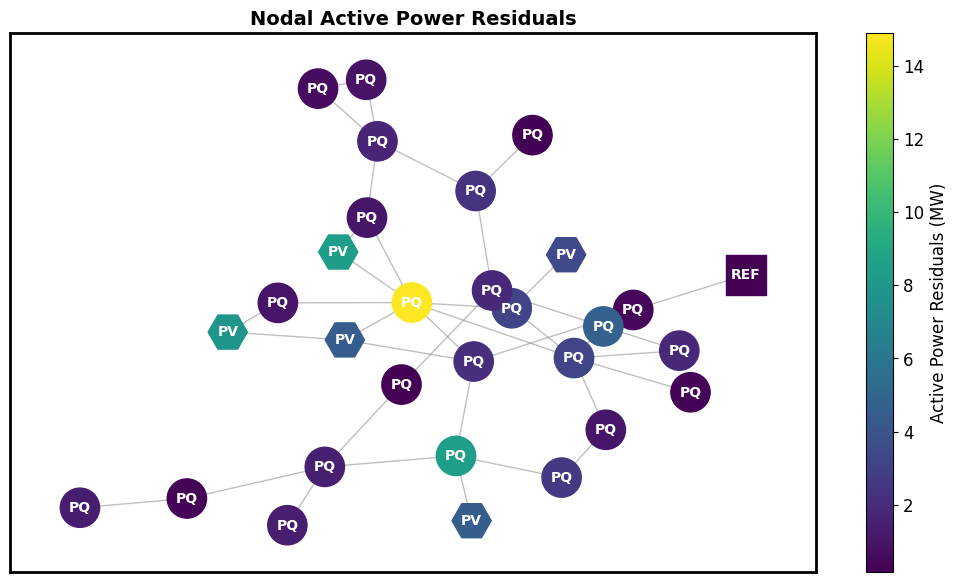

In [14]:
visualize_error(batch, output, data_module.node_normalizers[0])